In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	5
float64		column 2	0
float64		column 3	5
float64		column 4	15
float64		column 5	16
float64		column 6	5
float64		column 7	36
float64		column 8	10
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,209.000000,214.000000,209.000000,199.000000,198.000000,209.00000,178.000000,204.000000,214.000000
mean,1.518325,13.407850,2.686651,1.432010,72.637374,0.50177,8.891798,0.172843,0.057009
std,0.003047,0.816604,1.443177,0.493837,0.751639,0.65740,1.214611,0.487692,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.00000,5.790000,0.000000,0.000000
25%,1.516510,12.907500,2.090000,1.190000,72.290000,0.13000,8.272500,0.000000,0.000000
50%,1.517660,13.300000,3.480000,1.360000,72.790000,0.56000,8.595000,0.000000,0.000000
75%,1.519110,13.825000,3.600000,1.620000,73.080000,0.61000,9.137500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.21000,16.190000,3.150000,0.510000


<AxesSubplot:>

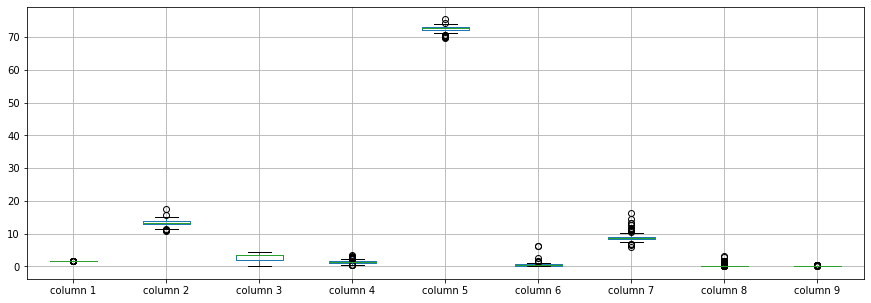

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518325
column 2    13.407850
column 3     2.686651
column 4     1.432010
column 5    72.637374
column 6     0.501770
column 7     8.891798
column 8     0.172843
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.204942,-0.121198,-0.401401,-0.542332,-0.303056,0.786675,0.040055,0.152786
column 2,-0.204942,1.000000,-0.277802,0.139164,-0.053700,-0.257234,-0.227701,0.329960,-0.241346
column 3,-0.121198,-0.277802,1.000000,-0.466389,-0.138368,-0.003377,-0.397968,-0.532789,0.083478
column 4,-0.401401,0.139164,-0.466389,1.000000,-0.069059,0.338313,-0.135957,0.435654,-0.104903
column 5,-0.542332,-0.053700,-0.138368,-0.069059,1.000000,-0.269267,-0.304976,-0.059798,-0.084327
column 6,-0.303056,-0.257234,-0.003377,0.338313,-0.269267,1.000000,-0.265904,-0.081702,-0.017929
column 7,0.786675,-0.227701,-0.397968,-0.135957,-0.304976,-0.265904,1.000000,0.033802,0.164895
column 8,0.040055,0.329960,-0.532789,0.435654,-0.059798,-0.081702,0.033802,1.000000,-0.056198
column 9,0.152786,-0.241346,0.083478,-0.104903,-0.084327,-0.017929,0.164895,-0.056198,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+40,9+40+40,9+40+40+40,9+40+40+40+40,9+40+40+40+40+40,9+40+40+40+40+40+40,9+40+40+40+40+40,9+40+40+40+40,9+40+40+40,9+40+40,9+40,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 95.41192216139574
Epoch: 1 , loss: 95.36539811354417
Epoch: 2 , loss: 94.97261223426231
Epoch: 3 , loss: 95.37759399414062
Epoch: 4 , loss: 94.83636885422926
Epoch: 5 , loss: 94.94864537165715
Epoch: 6 , loss: 94.99210768479567
Epoch: 7 , loss: 95.2236069899339
Epoch: 8 , loss: 94.84482985276442
Epoch: 9 , loss: 94.88984504112831
Epoch: 10 , loss: 94.85727867713341
Epoch: 11 , loss: 94.81304696890024
Epoch: 12 , loss: 94.7945310152494
Epoch: 13 , loss: 94.78557704045222
Epoch: 14 , loss: 94.74291522686298
Epoch: 15 , loss: 94.77318338247446
Epoch: 16 , loss: 94.78097886305589
Epoch: 17 , loss: 94.79848538912259
Epoch: 18 , loss: 95.22386286808894
Epoch: 19 , loss: 95.43734036959134
Epoch: 20 , loss: 94.67159329927884
Epoch: 21 , loss: 94.94588235708383
Epoch: 22 , loss: 94.71173799954929
Epoch: 23 , loss: 94.04688145564153
Epoch: 24 , loss: 92.97016906738281
Epoch: 25 , loss: 91.99002838134766
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(296.66378512586425, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.2720597908861508

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_AN_5(imp).xlsx", index=False, header=False)